## Group 9 - Assignment 2 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import norm

## Problem 1

In [3]:
stock_returns = pd.read_csv('Returns_Stocks.csv',delimiter=";")

In [4]:
# (a)
mean_aapl = stock_returns['AAPL'].mean()
var_aapl = stock_returns['AAPL'].var()
mean_ge = stock_returns['GE'].mean()
var_ge = stock_returns['GE'].var()
mean_gme = stock_returns['GME'].mean()
var_gme = stock_returns['GME'].var()
mean_pg = stock_returns['PG'].mean()
var_pg = stock_returns['PG'].var()
mean_tsla = stock_returns['TSLA'].mean()
var_tsla = stock_returns['TSLA'].var()

dict_mv = {
    'AAPL': (mean_aapl, var_aapl),
    'GE': (mean_ge, var_ge),
    'GME': (mean_gme, var_gme),
    'PG': (mean_pg, var_pg),
    'TSLA': (mean_tsla, var_tsla)
}

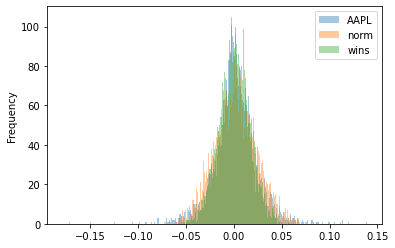

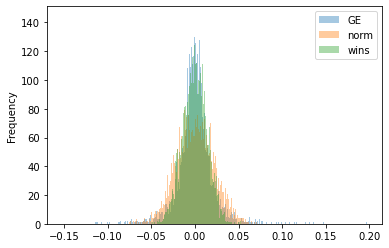

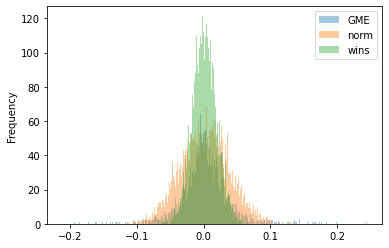

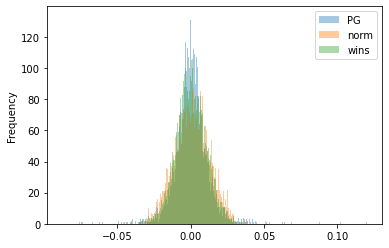

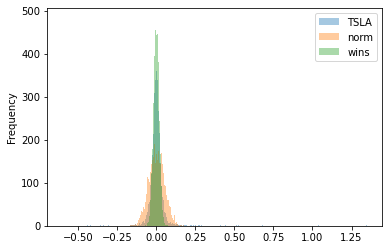

In [5]:
# (b)
# winsorized distributions
mean_aapl_w = stock_returns.loc[lambda df: abs(df['AAPL']) < 0.04]['AAPL'].mean()
var_aapl_w = stock_returns.loc[lambda df: abs(df['AAPL']) < 0.04]['AAPL'].var()
mean_ge_w = stock_returns.loc[lambda df: abs(df['GE']) < 0.04]['GE'].mean()
var_ge_w = stock_returns.loc[lambda df: abs(df['GE']) < 0.04]['GE'].var()
mean_gme_w = stock_returns.loc[lambda df: abs(df['GME']) < 0.04]['GME'].mean()
var_gme_w = stock_returns.loc[lambda df: abs(df['GME']) < 0.04]['GME'].var()
mean_pg_w = stock_returns.loc[lambda df: abs(df['PG']) < 0.04]['PG'].mean()
var_pg_w = stock_returns.loc[lambda df: abs(df['PG']) < 0.04]['PG'].var()
mean_tsla_w = stock_returns.loc[lambda df: abs(df['TSLA']) < 0.04]['TSLA'].mean()
var_tsla_w = stock_returns.loc[lambda df: abs(df['TSLA']) < 0.04]['TSLA'].var()

dict_wins = {
    'AAPL': (mean_aapl_w, var_aapl_w),
    'GE': (mean_ge_w, var_ge_w),
    'GME': (mean_gme_w, var_gme_w),
    'PG': (mean_pg_w, var_pg_w),
    'TSLA': (mean_tsla_w, var_tsla_w)
}

def gennormal(name, dic):
    return np.random.normal(dic[name][0], np.sqrt(dic[name][1]))

def genwinsor(name, dic):
    return np.random.normal(dic[name][0], np.sqrt(dic[name][1]))

for stock in dict_mv.keys():
    temp_ret = pd.DataFrame({stock: stock_returns[stock]})
    temp_ret['norm'] = [gennormal(stock, dict_mv) for k in temp_ret.index]
    temp_ret['wins'] = [genwinsor(stock, dict_wins) for k in temp_ret.index]
    temp_ret.plot.hist(bins=500, alpha=0.4)

In [6]:
# (c)
for stock in dict_mv.keys():
    mean = dict_mv[stock][0]
    variance = dict_mv[stock][1]
    var_95 = stock_returns[stock].quantile(0.05)
    var_99 = stock_returns[stock].quantile(0.01)
    norm_95 = norm.ppf(0.05, mean, np.sqrt(variance))
    norm_99 = norm.ppf(0.01, mean, np.sqrt(variance))
    print('For {}, the 95% VaR is {:.5f}, the 99% VaR is {:.5f}, the 95% Normal is {:.5f} and the 99% Normal is {:.5f}.'.format(stock, var_95, var_99, norm_95, norm_99))
    
    es95_norm = mean - np.sqrt(variance)*norm.pdf(norm.ppf(0.05, 0, 1))/norm.cdf(norm.ppf(0.05, 0, 1))
    es99_norm = mean - np.sqrt(variance)*norm.pdf(norm.ppf(0.01, 0, 1))/norm.cdf(norm.ppf(0.01, 0, 1))
    
    es95_emp = stock_returns[stock_returns[stock] < var_95][stock].mean()
    es99_emp = stock_returns[stock_returns[stock] < var_99][stock].mean()
    print('For {}, the 95% empirical ES is {:.5f}, the 99% empirical ES is {:.5f}, the 95% Normal ES is {:.5f} and the 99% Normal ES is {:.5f}.\n'.format(stock, es95_emp, es99_emp, es95_norm, es99_norm))

For AAPL, the 95% VaR is -0.03407, the 99% VaR is -0.05758, the 95% Normal is -0.03619 and the 99% Normal is -0.05177.
For AAPL, the 95% empirical ES is -0.05018, the 99% empirical ES is -0.07928, the 95% Normal ES is -0.04574 and the 99% Normal ES is -0.05951.

For GE, the 95% VaR is -0.03102, the 99% VaR is -0.06121, the 95% Normal is -0.03462 and the 99% Normal is -0.04899.
For GE, the 95% empirical ES is -0.04996, the 99% empirical ES is -0.08425, the 95% Normal ES is -0.04343 and the 99% Normal ES is -0.05614.

For GME, the 95% VaR is -0.05110, the 99% VaR is -0.08997, the 95% Normal is -0.05717 and the 99% Normal is -0.08170.
For GME, the 95% empirical ES is -0.07886, the 99% empirical ES is -0.12745, the 95% Normal ES is -0.07221 and the 99% Normal ES is -0.09390.

For PG, the 95% VaR is -0.01679, the 99% VaR is -0.03336, the 95% Normal is -0.01906 and the 99% Normal is -0.02713.
For PG, the 95% empirical ES is -0.02772, the 99% empirical ES is -0.04716, the 95% Normal ES is -0.

### Problem 1 d)
We can see that the normal distribution does not characterize well the stock returns distribution.
The 95% VaR is overestimated by the normal distribution and the 99% VaR is underestimated.
Both the 95% ES and the 99% one are underestimated using the normal distribution.
If we used the winsorized normal distribution, it would probably model the center of the distribution better, but it would be less good at predicting more extreme moves in the returns, which actually may happen in real life.

In [7]:
# (e)
bonds_returns = pd.read_csv('Returns_Bonds.csv',delimiter=";")
print(bonds_returns.head())

         date     b2ret    b10ret
0  1999-12-31  0.001144 -0.012400
1  2000-01-31 -0.001417 -0.009797
2  2000-02-29  0.006842  0.013598
3  2000-03-31  0.006593  0.034752
4  2000-04-28  0.001496 -0.010026


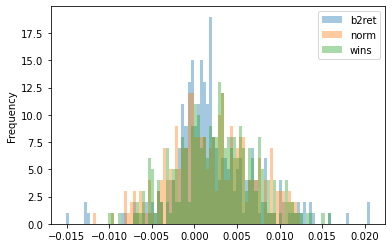

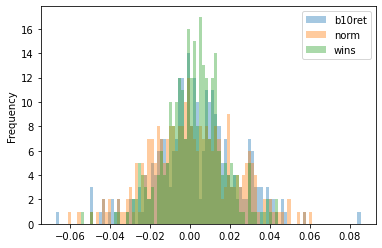

In [8]:
mean_2 = bonds_returns['b2ret'].mean()
var_2 = bonds_returns['b2ret'].var()
mean_10 = bonds_returns['b10ret'].mean()
var_10 = bonds_returns['b10ret'].var()

# winsorized distributions
mean_2_w = bonds_returns.loc[lambda df: abs(df['b2ret']) < 0.04]['b2ret'].mean()
var_2_w = bonds_returns.loc[lambda df: abs(df['b2ret']) < 0.04]['b2ret'].var()
mean_10_w = bonds_returns.loc[lambda df: abs(df['b10ret']) < 0.04]['b10ret'].mean()
var_10_w = bonds_returns.loc[lambda df: abs(df['b10ret']) < 0.04]['b10ret'].var()

dict_mv_bonds = {
    'b2ret': (mean_2, var_2),
    'b10ret': (mean_10, var_10)
}

dict_wins_bonds = {
    'b2ret': (mean_2_w, var_2_w),
    'b10ret': (mean_10_w, var_10_w)
}

for bond in dict_mv_bonds.keys():
    temp_ret = pd.DataFrame({bond: bonds_returns[bond]})
    temp_ret['norm'] = [gennormal(bond, dict_mv_bonds) for k in temp_ret.index]
    temp_ret['wins'] = [genwinsor(bond, dict_wins_bonds) for k in temp_ret.index]
    temp_ret.plot.hist(bins=100, alpha=0.4)


In [9]:
for bond in dict_mv_bonds.keys():
    mean = dict_mv_bonds[bond][0]
    variance = dict_mv_bonds[bond][1]
    var_95 = bonds_returns[bond].quantile(0.05)
    var_99 = bonds_returns[bond].quantile(0.01)
    norm_95 = norm.ppf(0.05, mean, np.sqrt(variance))
    norm_99 = norm.ppf(0.01, mean, np.sqrt(variance))
    print('For {}, the 95% VaR is {:.5f}, the 99% VaR is {:.5f}, the 95% Normal is {:.5f} and the 99% Normal is {:.5f}.'.format(bond, var_95, var_99, norm_95, norm_99))
    
    es95_norm = mean - np.sqrt(variance)*norm.pdf(norm.ppf(0.05, 0, 1))/norm.cdf(norm.ppf(0.05, 0, 1))
    es99_norm = mean - np.sqrt(variance)*norm.pdf(norm.ppf(0.01, 0, 1))/norm.cdf(norm.ppf(0.01, 0, 1))
    
    es95_emp = bonds_returns[bonds_returns[bond] < var_95][bond].mean()
    es99_emp = bonds_returns[bonds_returns[bond] < var_99][bond].mean()
    print('For {}, the 95% empirical ES is {:.5f}, the 99% empirical ES is {:.5f}, the 95% Normal ES is {:.5f} and the 99% Normal ES is {:.5f}.\n'.format(bond, es95_emp, es99_emp, es95_norm, es99_norm))

For b2ret, the 95% VaR is -0.00506, the 99% VaR is -0.01241, the 95% Normal is -0.00602 and the 99% Normal is -0.00938.
For b2ret, the 95% empirical ES is -0.00847, the 99% empirical ES is -0.01365, the 95% Normal ES is -0.00808 and the 99% Normal ES is -0.01105.

For b10ret, the 95% VaR is -0.03016, the 99% VaR is -0.04916, the 95% Normal is -0.03022 and the 99% Normal is -0.04418.
For b10ret, the 95% empirical ES is -0.04309, the 99% empirical ES is -0.05542, the 95% Normal ES is -0.03878 and the 99% Normal ES is -0.05113.



### Problem 1 f)
Once again, the normal distribution does not characterize too well the bond returns distribution, however, it does a better job than for the stocks. The VaRs and ESs are closer than before and on the graph, especially the 10-year bond is closer to the normal distribution values than the stocks.

In [10]:
#Import the relevant libraries 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wrds
from scipy import stats
from scipy.stats import norm

db = wrds.Connection(wrds='aelguindi')







WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
Loading library list...
Done


In [11]:

appl=db.raw_sql("select date, ret "
           "from crsp.dsf "
           "where permco in (7) "
           "and date>='2000-01-01'"
            "and date<='2022-12-31'")
procter_gamble = db.raw_sql("select date, ret "
           "from crsp.dsf "
           "where permco in (21446) "
           "and date>='2000-01-01'"
            "and date<='2022-12-31'")

In [12]:
#a)
#Merging apple and pg returns with date
returns = pd.merge(appl,procter_gamble, on = 'date')
#Converting string to date for resampling
returns["date"] = pd.to_datetime(returns['date'])
#Gross return
returns['ret_x'] += 1
returns['ret_y'] += 1
returns_weekly = returns.resample('W', on = 'date').prod() -1
#Gross return
appl_return = returns_weekly['ret_x'] 
pg_return = returns_weekly['ret_y'] 



#computing the (annualized) mean and std for both of the stocks :

mean_appl= 52 * appl_return.mean()
mean_pg= 52 * pg_return.mean()

std_appl= np.sqrt(52) * appl_return.std()
std_pg= np.sqrt(52) * pg_return.std()
corr_stocks = returns_weekly.corr()
print('The correlation between the two stocks is %f'%corr_stocks['ret_x']['ret_y'])



The correlation between the two stocks is 0.105876


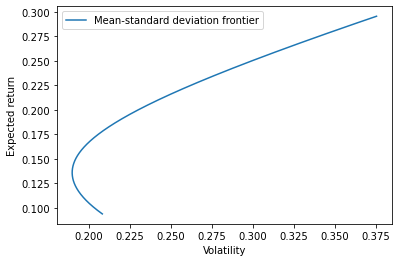

In [13]:
#b) Mean standard deviation frontier 
x = np.linspace(0,1,1500)

#Calculating the expected return / volatility of ther portfolio
R_p = x * mean_appl+ (1-x) * mean_pg
sigma_p = np.sqrt(x**2 * std_appl**2 + (1-x)**2 *std_pg**2 + 2 *x *(1-x) * corr_stocks['ret_x']['ret_y']* std_appl*std_pg)

plt.plot(sigma_p, R_p , label = 'Mean-standard deviation frontier')
plt.xlabel('Volatility')
plt.ylabel('Expected return')
plt.legend()
plt.show()

In [14]:
#C
#risk free constant 
r_f = 1.5/100
#Firstly, we compute the minimum index  
min_var = np.argmin(sigma_p)
#The minimal weight
x_min = x[min_var]
#The minimal return
return_min = x_min * mean_appl+ (1-x_min) * mean_pg
#Minimal standard deviation
std_min = np.sqrt(x_min**2 * std_appl**2 + (1-x_min)**2 *std_pg**2 + 2 *x_min *(1-x_min) * corr_stocks['ret_x']['ret_y']* std_appl*std_pg)

print('Weight of Apple is %f' % x_min)
print('Weight of P&G is %f' %(1-x_min))
print('The Expected return is %f'%return_min)
print('The volatilty is %f'%std_min)

#The sharpe ratio, we divided the risk free rate by 52 to get weekly basis

Sharpe_ratio_min = (return_min - r_f) / std_min


print('The Sharpe ratio is %f'%Sharpe_ratio_min)   


Weight of Apple is 0.208806
Weight of P&G is 0.791194
The Expected return is 0.135827
The volatilty is 0.189777
The Sharpe ratio is 0.636681


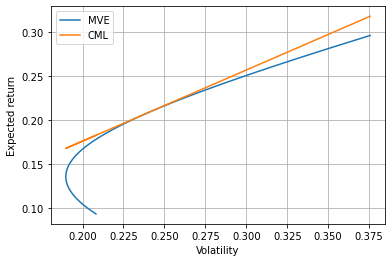

In [15]:
#d )
#One riky asset the other riskless
#expected return
#Firstly we calculate the maximum sharpe ratio which corresponds to the tangent point on the efficient frontier
sharpe_ratio = ((R_p) - r_f) / sigma_p
tang_point = np.amax(sharpe_ratio)
tang_point_index = np.argmax(sharpe_ratio)



#Getting x and y points to plot the line

x_plot = sigma_p
y_plot = tang_point* x_plot + r_f

plt.plot(sigma_p, R_p , label = 'MVE')
plt.xlabel('Volatility')
plt.ylabel('Expected return')

plt.plot(x_plot, y_plot, label = 'CML')
plt.grid()

plt.legend()
plt.show()



In [16]:
#(e)
#Getting the relevant date 
appl_n=db.raw_sql("select date, ret "
           "from crsp.dsf "
           "where permco in (7) "
           "and date>='2010-01-01'"
            "and date<='2020-12-31'")
procter_gamble_n = db.raw_sql("select date, ret "
           "from crsp.dsf "
           "where permco in (21446) "
           "and date>='2010-01-01'"
            "and date<='2020-12-31'")

#Merging apple and pg returns with date
returns_new = pd.merge(appl_n,procter_gamble_n, on = 'date')
#Converting string to date for resampling
returns_new["date"] = pd.to_datetime(returns_new['date'])
#Gross return
returns_new['ret_x'] += 1
returns_new['ret_y'] += 1
returns_weekly_new = returns_new.resample('W', on = 'date').prod() -1
appl_return_new = returns_weekly_new['ret_x'] 
pg_return_new = returns_weekly_new['ret_y'] 








 
corr_stocks_new = returns_weekly_new.corr()
print('The correlation between stocks is given by %f' % (corr_stocks_new['ret_x']['ret_y']))
std_min_new = np.sqrt(x_min**2 * std_appl**2 + (1-x_min)**2 *std_pg**2 + 2 *x_min *(1-x_min) * corr_stocks_new['ret_x']['ret_y']* std_appl*std_pg)
print('The new minimal std is %f'%std_min_new)

 


The correlation between stocks is given by 0.318733
The new minimal std is 0.203751


## We see that the correlation between the 2 stocks during this period increases to 0.31 (previously at 0.1). ceteris paribus, the minimum variance (keeping the weights and the individual volatilities the same ) increases as well. Meaning that we have a worse trade-off since the expected return stays the same. 

In [17]:
#f)
#Targeted standard deviation
std_target = 20/100
#getting the index of the sharpe_ratio

tang_point_index = np.argmax(sharpe_ratio)

std_sharpe_ratio = sigma_p[tang_point_index]
w = std_target/ std_sharpe_ratio
print('The risk free that should hold this weight %f'%(1-w))

print('We should hold %f in Apple' %(w*x[tang_point_index]))
print('We should hold %f in PG' %(w*(1-x[tang_point_index])))

#Computing the risk aversion coeffecient a
#Compute A,B terms, covariance matrix
sigma_mat=  returns_weekly_new.cov() * 52



#dimension of column for the vector
n = 1 
A = float(np.matmul(np.matmul(np.transpose(np.ones((np.shape(sigma_mat)[0],n)) ),np.linalg.inv(sigma_mat)),np.ones((np.shape(sigma_mat)[0],n))))


# Creating the vector of mean of weekly return for both stocks 
mean_appl_new = np.mean(appl_return_new) * 52

mean_PG_new = np.mean(pg_return_new) * 52

mu_mean = np.transpose(np.array([mean_appl_new, mean_PG_new]))

B =float(np.matmul(np.matmul(np.transpose(np.ones((np.shape(sigma_mat)[0],n)) ),np.linalg.inv(sigma_mat)),mu_mean))

# Calculating aversion





##

std_appl_n= np.sqrt(52) * appl_return_new.std()
std_pg_n= np.sqrt(52) * pg_return_new.std()          
var_apple = std_appl_n ** 2  
var_pg = std_pg_n ** 2        
w_tan = np.matmul(np.linalg.inv(sigma_mat), mu_mean - (r_f*np.ones(2).T)) / (B-A*r_f)
w_apple = w_tan[0] * w
w_pg = w_tan[1] * w

a = (mean_appl_new - r_f) / (w_apple * var_apple + w_pg* std_appl_n * std_pg_n * corr_stocks_new['ret_x']['ret_y']) 
print('The risk aversion coeffecient is given by %f' % a)






The risk free that should hold this weight 0.166856
We should hold 0.472986 in Apple
We should hold 0.360158 in PG
The risk aversion coeffecient is given by 6.733286


In [18]:
# g) 

#Calculating the weights of tangent portfolio
w_tan = np.matmul(np.linalg.inv(sigma_mat), mu_mean - (r_f*np.ones(2).T)) / (B-A*r_f)
mean_tang = np.matmul(mu_mean.T,w_tan)


# generating weights vector

weights = np.linspace(0.01,1, 2000)
mean_p = weights*mean_tang + (1-weights)*r_f
std_p = weights * np.sqrt(np.matmul(np.matmul(w_tan.T,sigma_mat),w_tan))

z = norm.ppf(0.01, loc=mean_p, scale=std_p)
w_tangency= weights[np.argmin(abs(z + 0.1))] 

print("Weight in the tangency portfolio is given by %f " % w_tangency)




Weight in the tangency portfolio is given by 0.477514 
